In [2]:
import pandas as pd
from keras.preprocessing.text import Tokenizer
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from keras import models, layers
import numpy as np
import matplotlib.pyplot as plt
from keras import preprocessing
import os

/Users/asifiqbal/workspace/envs/asif_python3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
df_train = pd.read_csv('train.csv')

In [4]:
df_train.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [5]:
df_test = pd.read_csv('test.csv')

In [6]:
corpus = pd.concat([df_train[['id', 'comment_text']], df_test[['id', 'comment_text']]])

In [7]:
stop_words = set(stopwords.words('english'))

In [8]:
max_length = 0

In [9]:
def pre_process(corpus):
    def remove_stopword(sentence):
        sentence = sentence.lower()
        tokenizer = RegexpTokenizer(r'\w+')
        tokens = tokenizer.tokenize(sentence)
        filtered_words = [w for w in tokens if not w in stop_words]
        return ' '.join(filtered_words)

    corpus['comment_text'] = corpus['comment_text'].apply(remove_stopword)
    return corpus

In [10]:
corpus = pre_process(corpus)

In [11]:
df_train = pd.merge(df_train, corpus, on='id', how='inner') \
             .rename(columns={'comment_text_y': 'comment_text'}).drop(['comment_text_x'], axis=1)

In [12]:
df_test = pd.merge(df_test, corpus, on='id', how='inner') \
            .rename(columns={'comment_text_y': 'comment_text'}).drop(['comment_text_x'], axis=1)

In [13]:
corpus['comment_text'].apply(lambda x: len(x.split(' '))).mean()

34.74456968359794

In [16]:
max_words = 10000

In [19]:
corpus = corpus.sample(frac=1).reset_index()
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(corpus['comment_text'])

In [20]:
sequences = tokenizer.texts_to_sequences(corpus['comment_text'])

In [21]:
df_train = df_train.sample(frac=1).reset_index()

In [22]:
one_hot_results = tokenizer.texts_to_matrix(df_train['comment_text'], mode='binary')

In [23]:
one_hot_results[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [24]:
len(tokenizer.word_counts)

348460

In [25]:
labels = df_train[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']]
labels = np.asarray(labels).astype('float32')

In [26]:
x_train = one_hot_results[:100000]
x_val = one_hot_results[100000:]
y_train = labels[:100000]
y_val = labels[100000:]

In [21]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(6, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.save_weights('my_model_weights.h5')
# model.load_weights('my_model_weights.h5')

In [22]:
epochs = 20
history = model.fit(x_train,
                    x,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 100000 samples, validate on 59571 samples
Epoch 1/20
100000/100000 [==============================] - 30s 297us/step - loss: 0.2574 - acc: 0.9556 - val_loss: 0.1119 - val_acc: 0.9679
Epoch 2/20
100000/100000 [==============================] - 31s 312us/step - loss: 0.0851 - acc: 0.9739 - val_loss: 0.0734 - val_acc: 0.9769
Epoch 3/20
100000/100000 [==============================] - 29s 291us/step - loss: 0.0643 - acc: 0.9792 - val_loss: 0.0670 - val_acc: 0.9793
Epoch 4/20
100000/100000 [==============================] - 29s 292us/step - loss: 0.0577 - acc: 0.9811 - val_loss: 0.0644 - val_acc: 0.9801
Epoch 5/20
100000/100000 [==============================] - 30s 296us/step - loss: 0.0535 - acc: 0.9821 - val_loss: 0.0632 - val_acc: 0.9804
Epoch 6/20
100000/100000 [==============================] - 29s 292us/step - loss: 0.0505 - acc: 0.9829 - val_loss: 0.0630 - val_acc: 0.9805
Epoch 7/20
100000/100000 [==============================] - 29s 291us/step - loss: 0.0480 - acc: 0.9836

In [31]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = 20
epoch_numbers = range(1, epochs + 1)

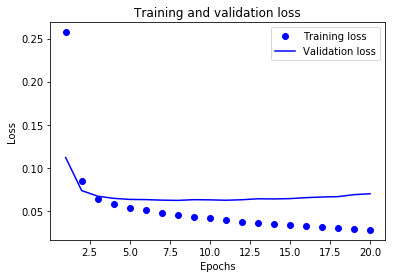

In [32]:
plt.plot(epoch_numbers, loss_values, 'bo', label='Training loss')
plt.plot(epoch_numbers, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show() 

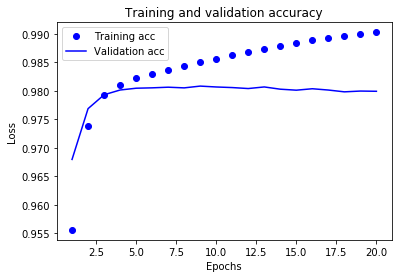

In [40]:
plt.plot(epoch_numbers, acc_values, 'bo', label='Training acc')
plt.plot(epoch_numbers, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
# plt.yticks(np.arange(min(acc_values) - 0.05, max(val_acc_values) + 0.05, .002))
plt.legend()
# plt.figure(figsize=(3,4))
plt.show()

In [59]:
# f, ax = plt.subplots(2, figsize=(10,15))
# ax[0].plot(epoch_numbers, loss_values, 'bo', label='Training loss')
# ax[0].plot(epoch_numbers, val_loss_values, 'b', label='Validation loss')
# ax[0].set_title('Training and validation loss')

# ax[1].plot(epoch_numbers, acc_values, 'bo', label='Training acc')
# ax[1].plot(epoch_numbers, val_acc_values, 'b', label='Validation acc')
# ax[1].set_title('Training and validation accuracy')

# f.subplots_adjust(hspace=0.3)

# plt.show()

#TF-IDF features

In [60]:
one_hot_tfidf_results = tokenizer.texts_to_matrix(df_train['comment_text'], mode='tfidf')

In [61]:
x_train = one_hot_tfidf_results[:100000]
x_val = one_hot_tfidf_results[100000:]

In [62]:
model.load_weights('my_model_weights.h5')

In [63]:
history = model.fit(x_train,
                    y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 100000 samples, validate on 59571 samples
Epoch 1/20
100000/100000 [==============================] - 32s 316us/step - loss: 0.1926 - acc: 0.9610 - val_loss: 0.0942 - val_acc: 0.9785
Epoch 2/20
100000/100000 [==============================] - 33s 334us/step - loss: 0.0755 - acc: 0.9806 - val_loss: 0.0751 - val_acc: 0.9800
Epoch 3/20
100000/100000 [==============================] - 33s 332us/step - loss: 0.0599 - acc: 0.9824 - val_loss: 0.0712 - val_acc: 0.9803
Epoch 4/20
100000/100000 [==============================] - 31s 309us/step - loss: 0.0526 - acc: 0.9837 - val_loss: 0.0703 - val_acc: 0.9804
Epoch 5/20
100000/100000 [==============================] - 31s 314us/step - loss: 0.0478 - acc: 0.9848 - val_loss: 0.0704 - val_acc: 0.9805
Epoch 6/20
100000/100000 [==============================] - 30s 301us/step - loss: 0.0438 - acc: 0.9860 - val_loss: 0.0709 - val_acc: 0.9806
Epoch 7/20
100000/100000 [==============================] - 31s 306us/step - loss: 0.0404 - acc: 0.9871

In [64]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = 20
epoch_numbers = range(1, epochs + 1)

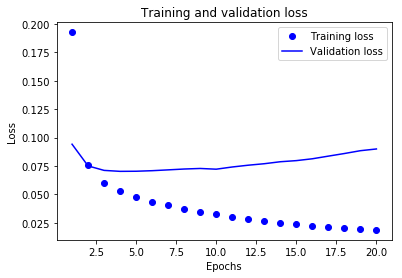

In [65]:
plt.plot(epoch_numbers, loss_values, 'bo', label='Training loss')
plt.plot(epoch_numbers, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show() 

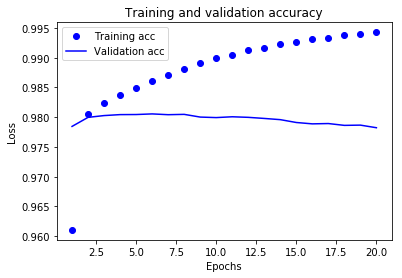

In [66]:
plt.plot(epoch_numbers, acc_values, 'bo', label='Training acc')
plt.plot(epoch_numbers, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
# plt.yticks(np.arange(min(acc_values) - 0.05, max(val_acc_values) + 0.05, .002))
plt.legend()
# plt.figure(figsize=(3,4))
plt.show()

# Learn an embedding

In [27]:
embedding_dimension = 100
max_len = 100

In [38]:
x_train = tokenizer.texts_to_sequences(df_train['comment_text'])
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=max_len)
y_train = labels

In [92]:
x_train.shape

(159571, 100)

In [95]:
model = models.Sequential()
model.add(layers.Embedding(max_words, 32, input_length=max_len))
model.add(layers.Flatten())
model.add(layers.Dense(6, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=512,
                    validation_split=0.3)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 100, 32)           320000    
_________________________________________________________________
flatten_6 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 6)                 19206     
Total params: 339,206
Trainable params: 339,206
Non-trainable params: 0
_________________________________________________________________
Train on 111699 samples, validate on 47872 samples
Epoch 1/10
111699/111699 [==============================] - 5s 41us/step - loss: 0.1308 - acc: 0.9623 - val_loss: 0.0808 - val_acc: 0.9717
Epoch 2/10
111699/111699 [==============================] - 4s 40us/step - loss: 0.0723 - acc: 0.9756 - val_loss: 0.0709 - val_acc: 0.9763
Epoch 3/10
111699/111699 [==============================] - 4s 38us/ste

In [98]:
history.history

{'acc': [0.9622870309576845,
  0.9755697448605457,
  0.9783972842555506,
  0.979477563259022,
  0.9801654255134351,
  0.980663788525251,
  0.9810353195861824,
  0.9814754920431241,
  0.9817903254908101,
  0.9822454193923158],
 'loss': [0.13080271986474926,
  0.07227688423288292,
  0.06441196427106087,
  0.060859307080182036,
  0.05864687837818864,
  0.057005393178882154,
  0.055549935828522676,
  0.05409716389469177,
  0.052689931915074116,
  0.051387716960419896],
 'val_acc': [0.971691862784605,
  0.9763222591762237,
  0.9782893020201494,
  0.9789125007741591,
  0.9785713107190668,
  0.9787767162934982,
  0.9794138325726922,
  0.9789124950368137,
  0.979427754241515,
  0.9794834597225495],
 'val_loss': [0.08078180600136997,
  0.07088314008744642,
  0.06754058603456313,
  0.06585395300292714,
  0.06633016255928233,
  0.06613144246652164,
  0.06435140644643396,
  0.06748319094512552,
  0.0659908451498511,
  0.06470493689418476]}

# Use pre-calculated embeddings (Glove)

In [18]:
glove_dir = 'glove.6B'
embeddings_index = {}
with open(os.path.join(glove_dir, 'glove.6B.300d.txt')) as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [29]:
max_len=200
embedding_dimension=300

word_index = tokenizer.word_index
train_sequences = tokenizer.texts_to_sequences(df_train['comment_text'])
train_data = preprocessing.sequence.pad_sequences(train_sequences, maxlen=max_len)

x_train = train_data[:100000]
x_val = train_data[100000:]
y_train = labels[:100000]
y_val = labels[100000:]

In [22]:
embedding_matrix = np.zeros((max_words, embedding_dimension))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [23]:
embedding_matrix.shape

(10000, 300)

In [24]:
model = models.Sequential()
model.add(layers.Embedding(max_words, embedding_dimension, input_length=max_len))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(6, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 300)          3000000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 60000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1920032   
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 198       
Total params: 4,920,230
Trainable params: 4,920,230
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.layers[0].weights[0].shape

TensorShape([Dimension(10000), Dimension(300)])

In [26]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [27]:
model.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['acc'])
history = model.fit(x_train, y_train,
                epochs=10,
                batch_size=512,
                validation_data=(x_val, y_val))

Train on 100000 samples, validate on 59571 samples
Epoch 1/10
100000/100000 [==============================] - 53s 527us/step - loss: 0.0935 - acc: 0.9722 - val_loss: 0.0721 - val_acc: 0.9767
Epoch 2/10
100000/100000 [==============================] - 57s 566us/step - loss: 0.0587 - acc: 0.9798 - val_loss: 0.0713 - val_acc: 0.9769
Epoch 3/10
100000/100000 [==============================] - 49s 486us/step - loss: 0.0488 - acc: 0.9829 - val_loss: 0.0742 - val_acc: 0.9769
Epoch 4/10
100000/100000 [==============================] - 49s 492us/step - loss: 0.0421 - acc: 0.9852 - val_loss: 0.0792 - val_acc: 0.9756
Epoch 5/10
100000/100000 [==============================] - 57s 573us/step - loss: 0.0371 - acc: 0.9871 - val_loss: 0.0832 - val_acc: 0.9773
Epoch 6/10
100000/100000 [==============================] - 54s 537us/step - loss: 0.0326 - acc: 0.9889 - val_loss: 0.0879 - val_acc: 0.9769
Epoch 7/10
100000/100000 [==============================] - 55s 549us/step - loss: 0.0291 - acc: 0.9903

# Use a simple RNN

In [33]:
model = models.Sequential()
model.add(layers.Embedding(10000, 32))
model.add(layers.SimpleRNN(32))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [39]:
embedding_dimension = 32
max_len = 200

x_train = tokenizer.texts_to_sequences(df_train['comment_text'])
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=max_len)
y_train = labels

In [44]:
model = models.Sequential()
model.add(layers.Embedding(max_words, embedding_dimension, input_length=max_len))
model.add(layers.SimpleRNN(32, return_sequences=True))
model.add(layers.SimpleRNN(32))
model.add(layers.Dense(6, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 200, 32)           320000    
_________________________________________________________________
simple_rnn_11 (SimpleRNN)    (None, 200, 32)           2080      
_________________________________________________________________
simple_rnn_12 (SimpleRNN)    (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 198       
Total params: 324,358
Trainable params: 324,358
Non-trainable params: 0
_________________________________________________________________


In [45]:
model.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=512,
                    validation_split=0.3)

Train on 111699 samples, validate on 47872 samples
Epoch 1/10
111699/111699 [==============================] - 69s 621us/step - loss: 0.1454 - acc: 0.9614 - val_loss: 0.0784 - val_acc: 0.9750
Epoch 2/10
111699/111699 [==============================] - 67s 599us/step - loss: 0.0670 - acc: 0.9777 - val_loss: 0.0629 - val_acc: 0.9792
Epoch 3/10
111699/111699 [==============================] - 68s 607us/step - loss: 0.0559 - acc: 0.9807 - val_loss: 0.0583 - val_acc: 0.9803
Epoch 4/10
111699/111699 [==============================] - 68s 610us/step - loss: 0.0511 - acc: 0.9819 - val_loss: 0.0611 - val_acc: 0.9805
Epoch 5/10
111699/111699 [==============================] - 67s 604us/step - loss: 0.0506 - acc: 0.9815 - val_loss: 0.0599 - val_acc: 0.9794
Epoch 6/10
111699/111699 [==============================] - 67s 603us/step - loss: 0.0479 - acc: 0.9826 - val_loss: 0.0571 - val_acc: 0.9797
Epoch 7/10
111699/111699 [==============================] - 67s 601us/step - loss: 0.0454 - acc: 0.9835

# Use LSTM

In [48]:
model = models.Sequential()
model.add(layers.Embedding(max_words, embedding_dimension, input_length=max_len))
model.add(layers.LSTM(32))
model.add(layers.Dense(6, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 200, 32)           320000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 198       
Total params: 328,518
Trainable params: 328,518
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=512,
                    validation_split=0.3)

Train on 111699 samples, validate on 47872 samples
Epoch 1/10
111699/111699 [==============================] - 110s 983us/step - loss: 0.1479 - acc: 0.9630 - val_loss: 0.0886 - val_acc: 0.9690
Epoch 2/10
111699/111699 [==============================] - 102s 913us/step - loss: 0.0639 - acc: 0.9777 - val_loss: 0.0597 - val_acc: 0.9796
Epoch 3/10
111699/111699 [==============================] - 108s 964us/step - loss: 0.0553 - acc: 0.9806 - val_loss: 0.0568 - val_acc: 0.9801
Epoch 4/10
111699/111699 [==============================] - 109s 974us/step - loss: 0.0500 - acc: 0.9819 - val_loss: 0.0539 - val_acc: 0.9810
Epoch 5/10
111699/111699 [==============================] - 116s 1ms/step - loss: 0.0481 - acc: 0.9824 - val_loss: 0.0534 - val_acc: 0.9807
Epoch 6/10
111699/111699 [==============================] - 116s 1ms/step - loss: 0.0467 - acc: 0.9828 - val_loss: 0.0536 - val_acc: 0.9813
Epoch 7/10
111699/111699 [==============================] - 115s 1ms/step - loss: 0.0455 - acc: 0.983

# Use GRU

In [50]:
model = models.Sequential()
model.add(layers.Embedding(max_words, embedding_dimension, input_length=max_len))
model.add(layers.GRU(32))
model.add(layers.Dense(6, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, 200, 32)           320000    
_________________________________________________________________
gru_1 (GRU)                  (None, 32)                6240      
_________________________________________________________________
dense_7 (Dense)              (None, 6)                 198       
Total params: 326,438
Trainable params: 326,438
Non-trainable params: 0
_________________________________________________________________


In [51]:
model.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=512,
                    validation_split=0.3)

Train on 111699 samples, validate on 47872 samples
Epoch 1/10
111699/111699 [==============================] - 93s 832us/step - loss: 0.1459 - acc: 0.9630 - val_loss: 0.0855 - val_acc: 0.9715
Epoch 2/10
111699/111699 [==============================] - 89s 796us/step - loss: 0.0632 - acc: 0.9782 - val_loss: 0.0659 - val_acc: 0.9792
Epoch 3/10
111699/111699 [==============================] - 79s 704us/step - loss: 0.0529 - acc: 0.9815 - val_loss: 0.0585 - val_acc: 0.9802
Epoch 4/10
111699/111699 [==============================] - 79s 706us/step - loss: 0.0502 - acc: 0.9820 - val_loss: 0.0539 - val_acc: 0.9805
Epoch 5/10
111699/111699 [==============================] - 81s 726us/step - loss: 0.0485 - acc: 0.9823 - val_loss: 0.0542 - val_acc: 0.9804
Epoch 6/10
111699/111699 [==============================] - 85s 765us/step - loss: 0.0470 - acc: 0.9825 - val_loss: 0.0627 - val_acc: 0.9801
Epoch 7/10
111699/111699 [==============================] - 121s 1ms/step - loss: 0.0457 - acc: 0.9830 

In [52]:
np.arange(5, 10)

array([5, 6, 7, 8, 9])